In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
iris=pd.read_csv("C:\\Users\\Rahul Patwal Rajput\\Downloads\\archive (1)\\IRIS.csv")

# Understanding the data

In [146]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [148]:
iris.dtypes # datatype

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [149]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [150]:
iris.describe() # It shows the statistical summary

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [152]:
iris.shape # Rows=150 & columns=5

(150, 5)

In [153]:
iris.isna().sum() # here is no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [154]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

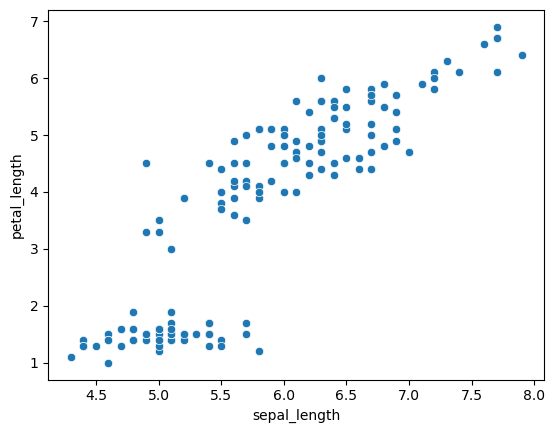

In [155]:
sns.scatterplot(x=iris['sepal_length'],y=iris['petal_length'])

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

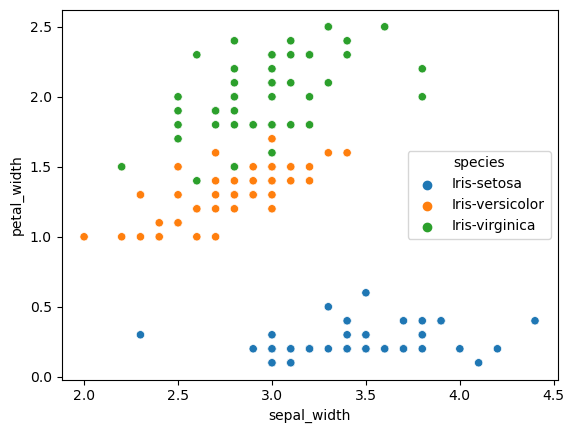

In [156]:
sns.scatterplot(x=iris['sepal_width'],y=iris['petal_width'],hue=iris['species'])

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

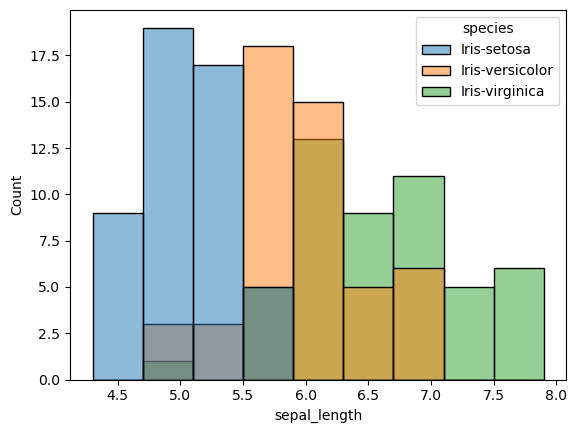

In [157]:
sns.histplot(x=iris['sepal_length'],hue=iris['species'])

C:\Users\Rahul Patwal Rajput\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

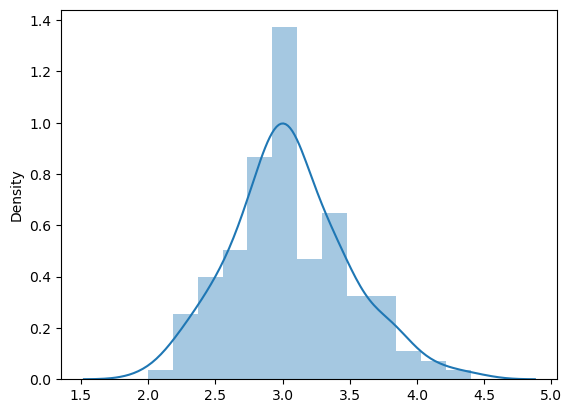

In [158]:
sns.distplot(x=iris['sepal_width'])

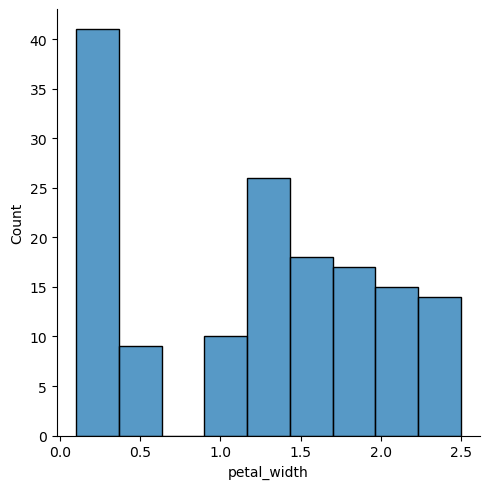

In [159]:
sns.displot(x=iris['petal_width'])

<AxesSubplot:xlabel='species', ylabel='count'>

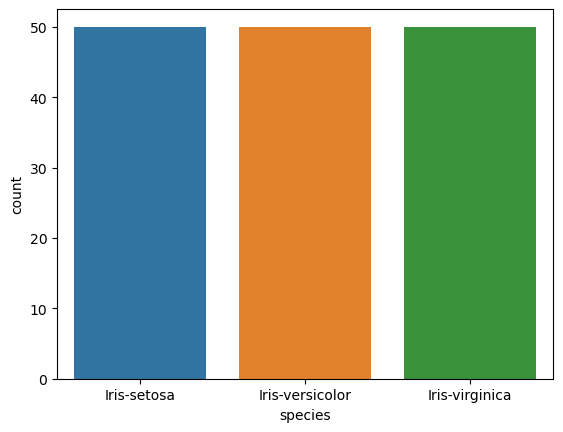

In [160]:
sns.countplot(x=iris['species'])

In [161]:
flower=iris.groupby('species')['sepal_length'].mean()

<AxesSubplot:xlabel='species'>

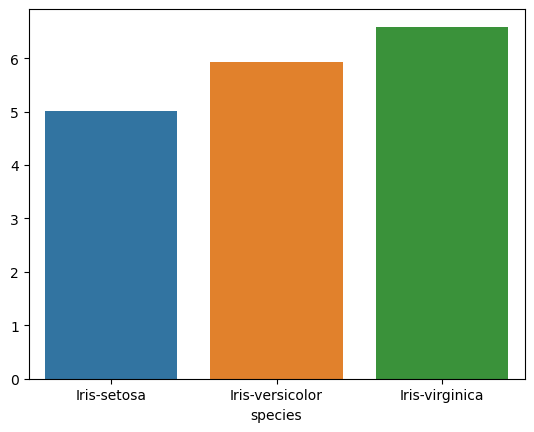

In [162]:
sns.barplot(x=flower.index,y=flower.values)

In [163]:
corrdf=iris.corr()
corrdf

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

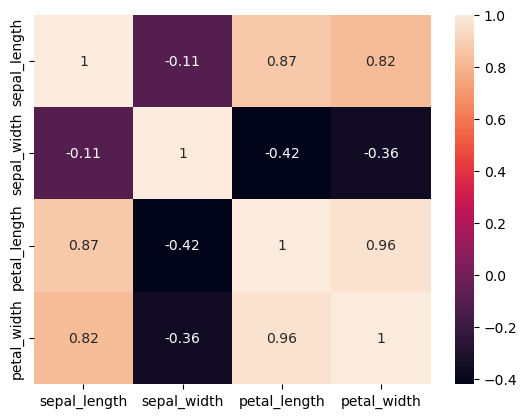

In [164]:
sns.heatmap(corrdf,annot=True)

<AxesSubplot:xlabel='sepal_width'>

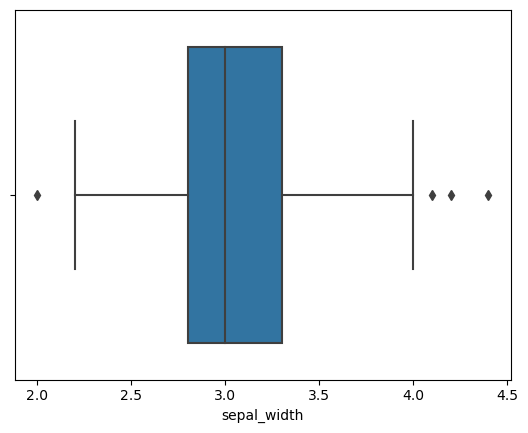

In [165]:
sns.boxplot(x=iris['sepal_width'])

# Outliers Treatment

In [166]:
contvar=iris.columns[iris.dtypes!='O']
contvar

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [167]:
for col in contvar:
    if col!='species':
        Q1=np.percentile(iris[col],25)
        Q3=np.percentile(iris[col],75)
        IQR=Q3-Q1
        LowerBound=Q1-1.5*IQR
        UpperBound=Q3+1.5*IQR
        UpperBound
        iris[col]=np.where(iris[col]<LowerBound,LowerBound,iris[col])
        iris[col]=np.where(iris[col]>UpperBound,UpperBound,iris[col])

<AxesSubplot:xlabel='sepal_width'>

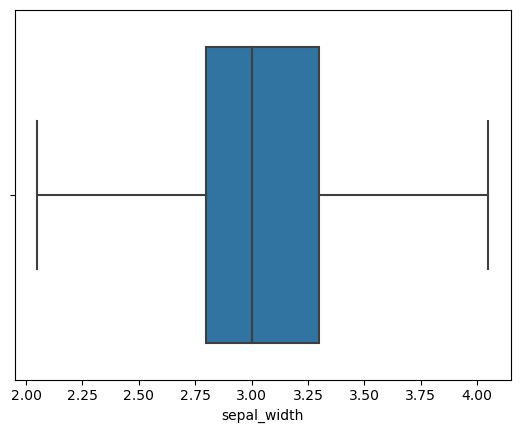

In [168]:
sns.boxplot(x=iris['sepal_width'])

# Iris Flower Classifiaction

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [173]:
x=iris[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris['species']

# Train_Test_Split

In [174]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=0)
print('x_test',x_test.shape)
print('y_test',y_test.shape)
print('x_train',x_train.shape)
print('y_train',y_test.shape)

x_test (120, 4)
y_test (120,)
x_train (30, 4)
y_train (120,)


In [175]:
scaler= StandardScaler()
x_train_scale=scaler.fit_transform (x_train)
x_test_scale=scaler.transform(x_test)

In [176]:
x_train_scale,x_test_scale

(array([[ 0.14956537, -0.58817233,  0.94512598,  1.91948971],
        [ 0.43000045, -1.99043747,  0.2829358 , -0.10102577],
        [-0.27108724,  2.3332134 , -1.28224097, -1.25560605],
        [ 2.25282843, -0.35446147,  1.66751526,  1.0535545 ],
        [-0.97217492,  0.81409282, -1.22204187, -1.25560605],
        [ 0.85065306,  0.58038196,  1.48691794,  2.06381224],
        [-0.97217492,  1.04780368, -1.34244008, -1.11128352],
        [ 1.41152321,  0.11296025,  0.70432955,  0.6205869 ],
        [ 1.55174074, -0.58817233,  0.76452866,  0.47626436],
        [ 0.57021798, -0.58817233,  0.2829358 ,  0.33194183],
        [ 0.57021798, -1.05559404,  1.24612151,  0.47626436],
        [ 0.9908706 ,  0.34667111,  0.58393134,  0.6205869 ],
        [ 0.57021798, -0.58817233,  0.70432955,  0.18761929],
        [ 1.13108813, -0.58817233,  0.64413044,  0.6205869 ],
        [ 0.57021798, -0.35446147,  0.70432955,  0.47626436],
        [-1.11239246,  0.11296025, -1.22204187, -1.39992858],
        

In [183]:
knnclassifier = KNeighborsClassifier(n_neighbors=3)
knnclassifier

KNeighborsClassifier(n_neighbors=3)

In [184]:
knnclassifier.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=3)

In [186]:
pred=knnclassifier.predict(x_test_scale)

C:\Users\Rahul Patwal Rajput\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [187]:
report=classification_report(y_test,pred)

In [189]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.62      0.95      0.75        37
 Iris-virginica       0.92      0.52      0.67        44

       accuracy                           0.81       120
      macro avg       0.85      0.82      0.81       120
   weighted avg       0.86      0.81      0.80       120

